In [1]:
import pandas as pd

df = pd.read_csv("../data/customers.csv")
df.head()

,customer_id,subscription_tier,region,tenure_months,monthly_spend
0,C001,Basic,NaN,2,25
1,C002,Basic,EU,5,30
2,C003,Basic,APAC,1,20
3,C004,Basic,NaN,8,35
4,C005,Basic,EU,12,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        40 non-null     object
 1   subscription_tier  40 non-null     object
 2   region             25 non-null     object
 3   tenure_months      40 non-null     int64 
 4   monthly_spend      40 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ KB


In [3]:
df.describe()

,tenure_months,monthly_spend
count,40.00000,40.000000
mean,17.80000,73.775000
std,14.51118,37.425816
min,1.00000,20.000000
25%,6.00000,48.000000
50%,14.50000,65.000000
75%,25.75000,91.250000
max,60.00000,160.000000


In [7]:
df["subscription_tier"].value_counts()

subscription_tier
Basic       14
Standard    13
Premium     13
Name: count, dtype: int64

In [8]:
df["region"].value_counts()

region
EU      14
APAC    11
Name: count, dtype: int64

In [9]:
avg_spend = (
  df
  .groupby("subscription_tier")["monthly_spend"]
  .mean()
  .reset_index()
)

avg_spend

,subscription_tier,monthly_spend
0,Basic,40.071429
1,Premium,116.923077
2,Standard,66.923077


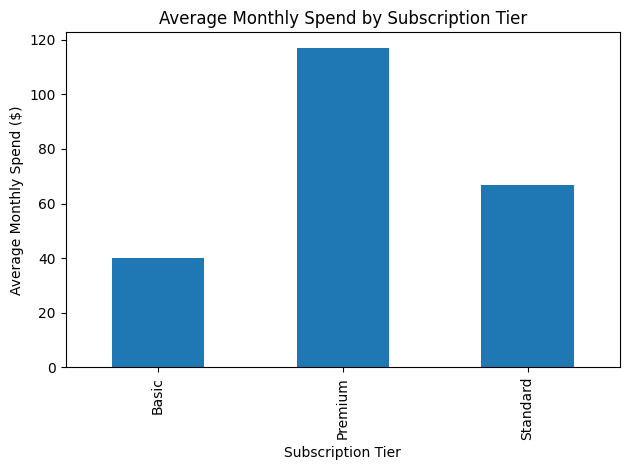

In [10]:
import matplotlib.pyplot as plt

avg_spend.plot(
  x="subscription_tier",
  y="monthly_spend",
  kind="bar",
  legend=False
)

plt.xlabel("Subscription Tier")
plt.ylabel("Average Monthly Spend ($)")
plt.title("Average Monthly Spend by Subscription Tier")
plt.tight_layout()
plt.show()